# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Plasticita - Podmínky plasticity - Mises, Tresca

## Zadání

Dva vzorky tvaru krychle o hraně s počáteční délkou $H = 200$ mm jsou zatěžovány postupně narůstajícími silami $F_1$, $F_2$ a $F_3$. Po celou dobu zatěžování jsou síly u obou vzorků udržovány v konstantním poměru $F_1:F_2:F_3 = 2:-4:5$.

První vzorek je z materiálu, jehož chování lze popsat pomocí ideálně pružnoplastického modelu s Misesovou podmínkou plasticity, druhý vzorek je z materiálu, jehož chování lze popsat pomocí ideálně pružnoplastického modelu s Trescovou podmínkou plasticity. Oba materiály mají stejnou hodnotu meze kluzu ve smyku.

Určete, který ze vzorků během zatěžování dosáhne plastického stavu dříve. (U obou vzorků je během zkoušky zatížení zvyšováno stejnou rychlostí.)

Dále určete jednotlivé složky deformace prvního vzorku v okamžiku, kdy tento vzorek dosáhne plastického stavu, pokud znáte jeho objemovou deformaci $\varepsilon_V = 2,\!4$ promile a Poissonův součinitel $\nu=0.25$.

*Poznámka: Misesova funkce plasticity má tvar  
$f(\sigma)=\sqrt{J_2}-\tau_0$.  
Invariant $J_2$ je možné vyjádřit např. jako  
$J_2=\frac{1}{6}[(\sigma_1-\sigma_2)^2+(\sigma_1-\sigma_3)^2+(\sigma_2-\sigma_3)^2]$.  
Trescova funkce plasticity má tvar  
$f(\sigma)=\tau_{max}(\sigma)-\tau_0$.*


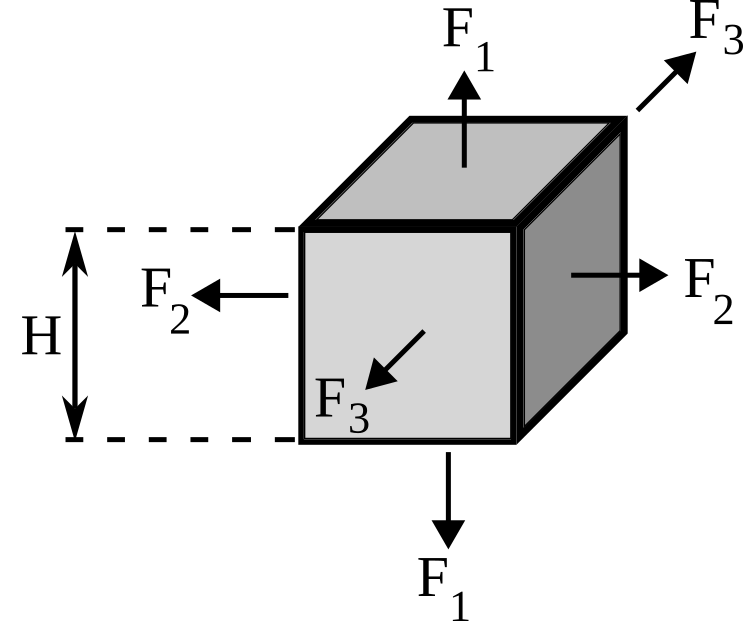

In [23]:
from IPython.display import display, Image
display(Image(filename="plasticita_kostka.png", width=450))

Import potřebných knihoven

In [24]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

from sympy import *
import sympy as smp

## Řešení

**Definice proměnných pro symbolické výpočty**

In [25]:
# Použité symboly
sigma = smp.symbols('sigma', real=True)  # napětí
E = smp.symbols('E', real=True, positive=True)  # modul pružnosti
nu = smp.symbols('\nu', real=True, positive=True)  # Poissonův součinitel

# Složky napětí
sigma_x = smp.symbols('\sigma_x', real=True)  # napětí ve směru osy x
sigma_y = smp.symbols('\sigma_y', real=True)  # napětí ve směru osy y
sigma_z = smp.symbols('\sigma_z', real=True)  # napětí ve směru osy z

# Složky deformace
eps_x = smp.symbols('\varepsilon_x', real=True)  # deformace ve směru osy x
eps_y = smp.symbols('\varepsilon_y', real=True)  # deformace ve směru osy y
eps_z = smp.symbols('\varepsilon_z', real=True)  # deformace ve směru osy z
eps_V = smp.symbols('eps_{V}', real=True)  # objemová deformace vzorku

**Konkrétní hodnoty dle zadání**



### Porovnání dosažení plastického stavu

**zatěžovací program**
$\sigma_x:\sigma_y:\sigma_z = 2:-4:5$

In [26]:
sigma_x = 2*sigma
sigma_y = -4*sigma
sigma_z = 5*sigma

# MISES:
#$J_2=\frac{1}{6}[(\sigma_1-\sigma_2)^2+(\sigma_1-\sigma_3)^2+(\sigma_2-\sigma_3)^2]$
J2 = (1/6) * ((sigma_x - sigma_y)**2 + (sigma_x - sigma_z)**2 + (sigma_y - sigma_z)**2)
J2_symplify = J2.simplify()
print(J2_symplify)

# tau_0 = sqrt(J2)
tau_0_M = smp.sqrt(J2)
tau_0_M_symplify = tau_0_M.simplify()
print(tau_0_M_symplify)


# TRESCA:
# $f(\sigma)=\tau_{max}(\sigma)-\tau_0 = 0$
# \tau_max = (sigma_max - sigma_min) / 2
tau_max = (sigma_z - sigma_y) / 2
tau_0_T = tau_max
tau_0_T_symplify = tau_0_T.simplify()
print(tau_0_T_symplify)

# Porovnání mezi Mises a Tresca (pro jednotkovou hodnotu sigma)
val_Mises = tau_0_M.subs({sigma: 1}).evalf()
val_Tresca = tau_0_T.subs({sigma: 1}).evalf()
print(f"Mises = {val_Mises:.3f}")
print(f"Tresca = {val_Tresca:.3f}")

print("\033[1mDruhý vzorek s Misesovou podmínkou plasticity dosáhne plastického stavu dříve.\033[0m")

21.0*sigma**2
4.58257569495584*Abs(sigma)
9*sigma/2
Mises = 4.583
Tresca = 4.500
Druhý vzorek s Misesovou podmínkou plasticity dosáhne plastického stavu dříve.


### Složky deformace 1. vzorku

In [27]:
eps_V = eps_x + eps_y + eps_z
val_eps_V = 2.4/1000

nu = 0.25
eps_x = 1/E * (sigma_x - nu * (sigma_y + sigma_z))
eps_x_symplify = eps_x.simplify()
print(f"eps_x = {eps_x_symplify}")
eps_y = 1/E * (sigma_y - nu * (sigma_x + sigma_z))
eps_y_symplify = eps_y.simplify()
print(f"eps_y = {eps_y_symplify}")
eps_z = 1/E * (sigma_z - nu * (sigma_x + sigma_y))
eps_z_symplify = eps_z.simplify()
print(f"eps_z = {eps_z_symplify}")
# z těchto vyjádření známe poměr složek, víme tedy v jakém poměru mezi složky rozdělit objemovou deformaci

coef_x = eps_x_symplify.subs({sigma: 1, E: 1})
coef_y = eps_y_symplify.subs({sigma: 1, E: 1})
coef_z = eps_z_symplify.subs({sigma: 1, E: 1})
print(f"coef_x = {coef_x:.3f}")
print(f"coef_y = {coef_y:.3f}")
print(f"coef_z = {coef_z:.3f}")

coef = val_eps_V / (coef_x + coef_y + coef_z)
print(f"coef = {coef:.3f}")

val_eps_x = coef_x * coef
val_eps_y = coef_y * coef
val_eps_z = coef_z * coef

print("\n")
print("\033[1mSložky deformace 1. vzorku při dosažení plastického stavu:\033[0m")
print(f"\033[1meps_x = {val_eps_x:.6f}\033[0m")
print(f"\033[1meps_y = {val_eps_y:.6f}\033[0m")
print(f"\033[1meps_z = {val_eps_z:.6f}\033[0m")



eps_x = 1.75*sigma/E
eps_y = -5.75*sigma/E
eps_z = 5.5*sigma/E
coef_x = 1.750
coef_y = -5.750
coef_z = 5.500
coef = 0.002


Složky deformace 1. vzorku při dosažení plastického stavu:
eps_x = 0.002800
eps_y = -0.009200
eps_z = 0.008800
